# Random Undersampling

Random undersampling trích xuất ngẫu nhiên các mẫu của lớp đa số cho tới khi đạt tới tỷ lệ nhất định so với lớ thiểu số, thường là 50:50.

- **Tiêu chí loại bỏ dữ liệu**: ngẫu nhiên
- **Kích thước tập dữ liệu cuối cùng**: 2 x lớp thiểu số

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

## Tạo dữ liệu

Chúng ta sẽ tạo dữ liệu mà các phân lớp có mức độ phân tách khác nhau.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
def make_data(sep):
    
    #  trả về mảng
    ## Yêu cầu 1:
    ## VIẾT CODE Ở ĐÂY:
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# mức độ phân tách các lớp
                           random_state=1)
    
    # biến đổi mảng thành pandas df và series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

<details><summary> Gợi ý </summary>

Sử dụng ```make_classification```

</details>

0    983
1     17
dtype: int64


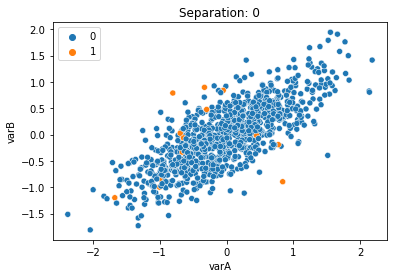

0    983
1     17
dtype: int64


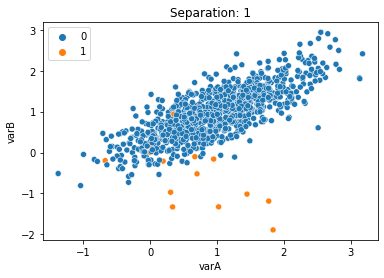

0    983
1     17
dtype: int64


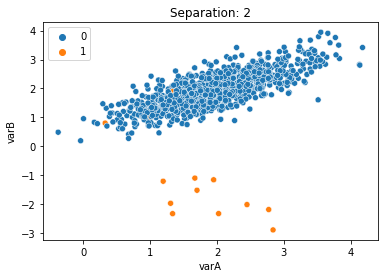

In [4]:
# tạo tập dữ liệu có phân tách lớp khác nhau
# và vẽ biểu đồ

for sep in [0, 1, 2]:
    ## Yêu cầu 2:
    ## VIẾT CODE Ở ĐÂY:
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )
    
    plt.title('Separation: {}'.format(sep))
    plt.show()

<details><summary> Gợi ý </summary>

Sử dụng ```make_data```

</details>

Khi chúng ta tăng tham số **sep**, lớp thiểu số và lớp đa số thể hiện mức độ chồng chéo ít hơn.

## Random Undersampling

[RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

Chọn ngẫu nhiên các mẫu của lớp đa số cho đến khi số lượng quan sát của lớp đa số bằng số lượng quan sát của lớp thiểu số.

In [5]:
# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập lớp random undersampling
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
rus = RandomUnderSampler(
    sampling_strategy='auto',  # chỉ lấy mẫu lớp đa số
    random_state=0,  # khả năng tái lặpß
    replacement=True # có nên lấy lại mẫu với replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[RandomUnderSampler()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

</details>

In [6]:
# kích thước dữ liệu gốc

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [8]:
# số quan sát của lớp thiểu số

y.value_counts()

0    983
1     17
dtype: int64

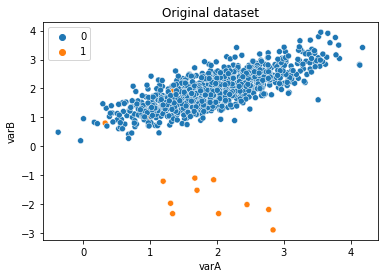

In [9]:
# vẽ biểu đồ dữ liệu ban đầu

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

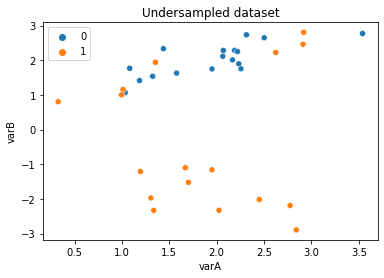

In [10]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

Các mẫu cho thấy quan sát tương tự như trong tập dữ liệu gốc. Đây là kết quả của việc loại dữ liệu ngẫu nhiên.

**BÀI TẬP**: 

- thay đổi độ phân tách khi tạo dữ liệu và chạy lại các cell trên, rồi so sánh các biểu đồ.

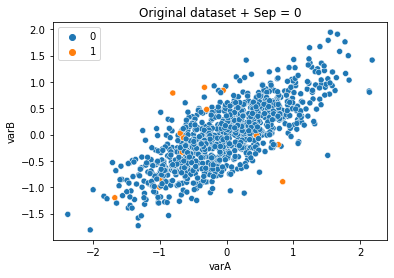

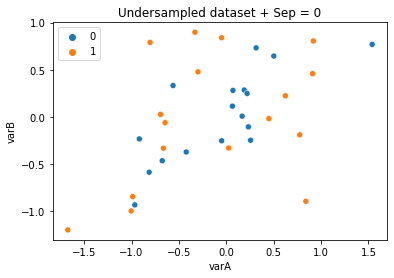

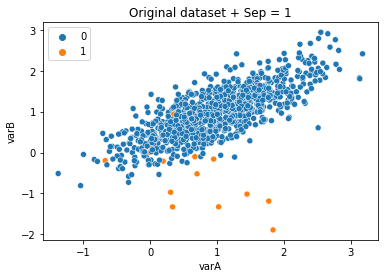

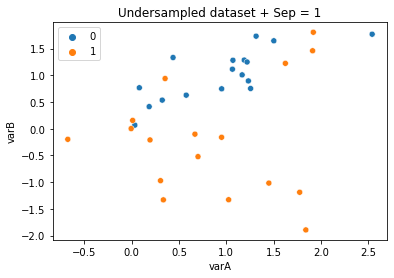

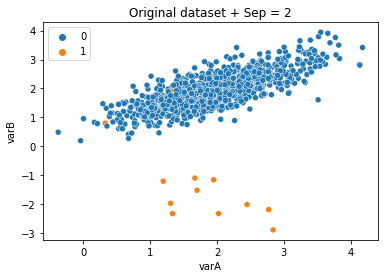

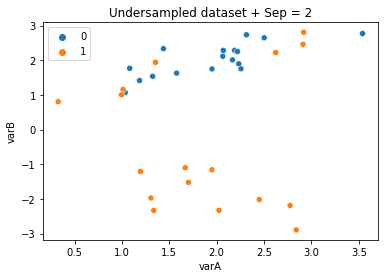

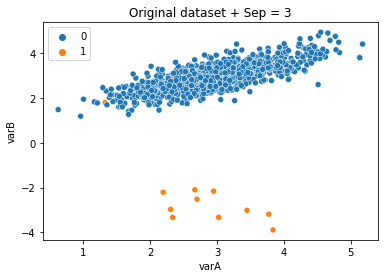

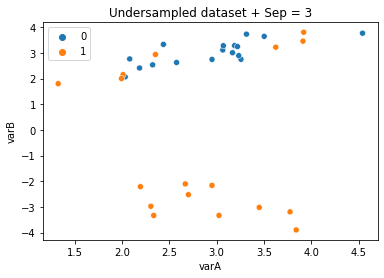

In [11]:
for sep in [0, 1, 2, 3]:
    X, y = make_data(sep)
    rus = RandomUnderSampler(
        sampling_strategy='auto',  # chỉ lấy mẫu lớp đa số
        random_state=0,  # khả năng tái lặp
        replacement=True # có nên lấy lại mẫu với replacement
    )
    X_resampled, y_resampled = rus.fit_resample(X, y)
    
    # Plot data
    sns.scatterplot(data=X, x="varA", y="varB", hue=y)
    plt.title('Original dataset + Sep = '+ str(sep))
    plt.show()
    
    sns.scatterplot(data=X_resampled, x="varA", y="varB", hue=y_resampled)
    plt.title('Undersampled dataset + Sep = '+ str(sep))
    plt.show()

## Load dữ liệu

In [12]:
# load dữ liệu
data = pd.read_csv('kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [13]:
# kích thước dữ liệu
data.shape

(145751, 75)

## Mục tiêu không cân bằng

In [14]:
# mục tiêu không cân bằng
data.target.value_counts() / len(data)

-1    0.991108
 1    0.008892
Name: target, dtype: float64

## Tách thành tập huấn luyện và tập kiểm tra

In [15]:
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# rus = RandomUnderSampler(
#     sampling_strategy='auto',  # samples only from majority class
#     random_state=0,  # for reproducibility
#     replacement=True # if it should resample with replacement
# )  

# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

## Random Undersampling

[RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

In [16]:
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
rus = RandomUnderSampler(
    sampling_strategy='auto',  # chỉ lấy mẫu của lớp đa số
    random_state=0,  # khả năng tái lặp
    replacement=True # có nên lấy lại mẫu với replacement
)  

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [17]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((2046, 74), (2046,))

In [18]:
# số lớp positive trong tập dữ liệu ban đầu
y_train.value_counts()

-1    115577
 1      1023
Name: target, dtype: int64

In [19]:
# kích thước dữ liệu cuối cùng gấp đôi số quan sát
# của lớp positive:

y_train.value_counts()[1] * 2

2046

## Vẽ biểu đồ dữ liệu

Hãy so sánh xem dữ liệu trông như thế nào trước và sau undersampling sử dụng biểu đồ phân tán từ seaborn.

<AxesSubplot:xlabel='0', ylabel='1'>

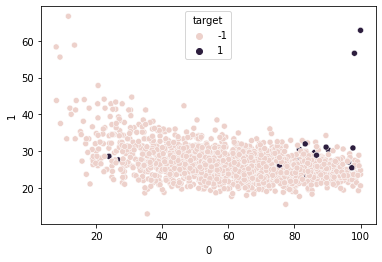

In [20]:
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(data=data.sample(1784, random_state=0),
                x="0",
                y="1",
                hue="target")

<AxesSubplot:xlabel='0', ylabel='1'>

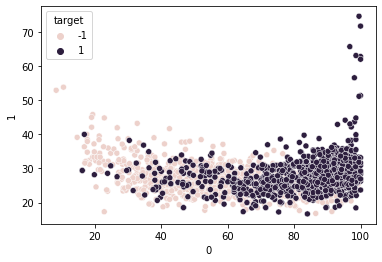

In [21]:
col_names = [str(i) for i in range(74)] +['target']

data_resampled = pd.concat([X_resampled, y_resampled], axis=1)
data_resampled.columns = col_names

## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(data=data_resampled, x="0", y="1", hue="target")

Các phân phối này tương tự như phân phối dữ liệu ban đầu. Chúng ta sẽ thấy các chấm màu tím vì chúng không không bị các chấm màu hồng che khuất.

<AxesSubplot:xlabel='4', ylabel='5'>

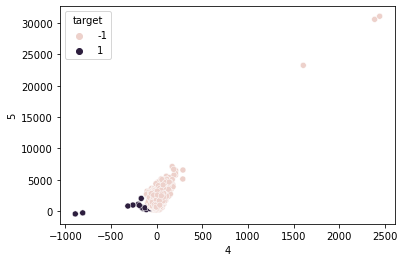

In [22]:
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(data=data.sample(1784, random_state=0),
                x="4",
                y="5",
                hue="target")

<AxesSubplot:xlabel='4', ylabel='5'>

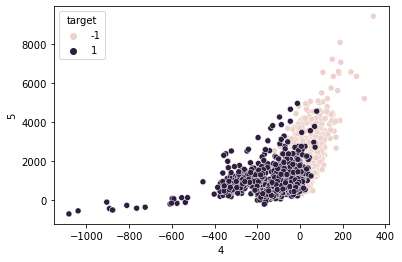

In [23]:
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:
sns.scatterplot(data=data_resampled, x="4", y="5", hue="target")

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [24]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    ## Yêu cầu 9:
    ## VIẾT CODE Ở ĐÂY:
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    # tính xác suất dự đoán (sử dụng 'predict_proba')
    pred = rf.predict_proba(X_train)
    # sử dụng 'roc_auc_score' từ sklearn để in ra hệ số huấn luyện 
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    # tính xác suất dự đoán (sử dụng 'predict_proba')
    pred = rf.predict_proba(X_test)
    # sử dụng 'roc_auc_score' từ sklearn để in ra hệ số kiểm tra
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

<details><summary> Gợi ý </summary>

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

</details>

### Các lớp bị phân tách một phần

Hãy lặp lại bài tập tương tự trong dữ liệu mà các lớp không được phân tách quá rõ ràng.

In [25]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng

## Yêu cầu 10:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9772915858585041
Test set
Random Forests roc-auc: 0.9719373303935948


In [26]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled

## Yêu cầu 11:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9937765699756052
Test set
Random Forests roc-auc: 0.9865029007975195


Có sự tăng vọt về chất lượng mô hình.

**BÀI TẬP**

- Thử random undersampling khi có hoặc không có thay thế và với các mô hình học máy khác nhau.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

classifiers = {
    "Nearest_Neighbors": KNeighborsClassifier(n_neighbors=3),
    # "Linear_SVM": SVC(kernel="linear", C=0.025),
    # "RBF_SVM": SVC(gamma=2, C=1),
    # "Gause_Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision_Tree": DecisionTreeClassifier(max_depth=5),
    "Random_Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    # "Neural_Network": MLPClassifier(alpha=1, max_iter=1000),
    "Ada_Boost": AdaBoostClassifier(),
    "Naive_Bayers": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

roc_full = {}
roc_resample = {}

for name, model in classifiers.items():
    print("running...", name)
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)
    roc_full[name] = roc_auc_score(y_test, pred[:, 1])
    print("roc auc (full):", roc_full[name])
    
    model.fit(X_resampled, y_resampled)
    pred = model.predict_proba(X_test)
    roc_resample[name] = roc_auc_score(y_test, pred[:, 1])
    print("roc auc (resample):", roc_resample[name])
    print("done")


running... Nearest_Neighbors
roc auc (full): 0.8071640020528448
roc auc (resample): 0.8790144569284398
done
running... Decision_Tree
roc auc (full): 0.8657491018804129
roc auc (resample): 0.9608468441316977
done
running... Random_Forest
roc auc (full): 0.924793567583927
roc auc (resample): 0.9758998763777488
done
running... Ada_Boost
roc auc (full): 0.9886576013731634
roc auc (resample): 0.9881313252391583
done
running... Naive_Bayers
roc auc (full): 0.9742082835787386
roc auc (resample): 0.9741964870782656
done
running... QDA
roc auc (full): 0.9727580116630604
roc auc (resample): 0.9773840156657527
done


# Condensed Nearest Neighbours (CNN)

Thuật toán hoạt động như sau:

1) Đặt tất cả các quan sát của lớp thiểu số vào một nhóm, gọi là nhóm O

2) Thêm 1 mẫu (ngẫu nhiên) của lớp đa số vào nhóm O

3) Huấn luyện KNN với nhóm O

4) Lấy một mẫu của lớp đa số mà không nằm trong nhóm O

5) Dự đoán lớp của nó với KNN từ điểm 3

6) Nếu dự đoán đúng, đi tới 4 và lặp lại

7) Nếu dự đoán sai, thêm mẫu đó vào nhóm O, đi tới 3 và lặp lai

8) Tiếp tục cho tới khi toàn bộ mẫu của lớp đa số được gán cho O hoặc không còn mẫu nào

9) Phiên bản cuối cùng của nhóm O là tập dữ liệu undersampled


====

- **Tiêu chí loại dữ liệu**: Các mẫu ngoài ranh giới giữa các lớp
- **Kích thước tập dữ liệu cuối cùng**: biến thiên

====

Thuật toán này có xu hướng chọn các điểm gần ranh giới mờ giữa các phân lớp và chuyển chúng vào nhóm O, như trong ví dụ.

 Nếu các lớp tương tự nhau, nhóm O sẽ chứa một lượng hợp lý của cả hai lớp. Nếu các lớp khác nhau, nhóm O sẽ chứa chủ yếu 1 lớp: lớp thiểu số.

**Chú ý:**

- CNN có xu hướng thêm nhiễu vào tập dữ liệu undersampled
- Khá tốn kém về mặt tính toán vì mỗi lần thêm một quan sát vào nhóm lớp thiểu số, nó lại huấn luyện 1 KNN.

Trong notebook này, trước tiên chúng ta sẽ tìm hiểu CNN thực hiện những gì trong dữ liệu mô phỏng, sau đó so sánh tác động của nó tới chất lượng mô hình với dữ liệu thực.

In [30]:
from imblearn.under_sampling import CondensedNearestNeighbour

## Undersample với Condensed Nearest Neighbours


[CondensedNearestNeighbour](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html)


### Các lớp được phân tách tốt

In [31]:
## Yêu cầu 12:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập condensed nearest neighbour transformer

cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    random_state=0,  # khả năng tái lặp
    n_neighbors=1,# mặc định
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = cnn.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[CondensedNearestNeighbour()](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html)

</details>

In [32]:
# kích thước dữ liệu gốc

X.shape, y.shape

((1000, 2), (1000,))

In [33]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((70, 2), (70,))

In [34]:
# số quan sát của lớp thiểu số

y.value_counts()

0    983
1     17
dtype: int64

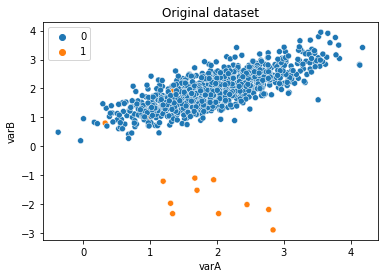

In [35]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

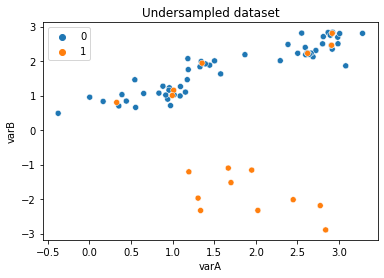

In [36]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

Condensed Nearest Neighbours giữ lại các quan sát của lớp đa số, chúng giống với các quan sát của lớp thiểu số.

**Lưu ý cách các giá trị lớn hơn trong đó varA > 3 và varB >3 không được đưa vào tập dữ liệu undersampled**

### Các lớp bị phân tách một phần

In [37]:
# tạo dữ liệu
X, y = make_data(sep=0.5)

# thiết lập condensed nearest neighbour transformer

## Yêu cầu 13:
## VIẾT CODE Ở ĐÂY:
cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    random_state=0,  # khả năng tái lặp
    n_neighbors=1,
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = cnn.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[CondensedNearestNeighbour()](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html)

</details>

In [38]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [39]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((101, 2), (101,))

Lưu ý rằng có nhiều mẫu hơn được đưa vào tập huấn luyện cuối cùng, so với các trường hợp trước có các lớp bị phân tách nhiều hơn

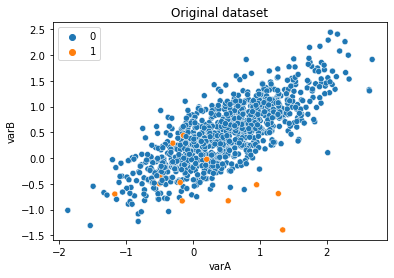

In [40]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

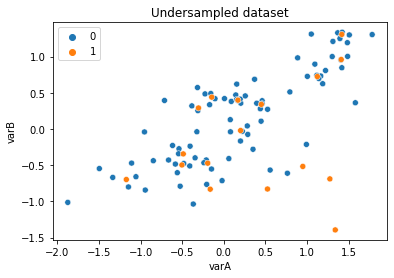

In [41]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

Lưu ý lần nữa rằng CNN duy trì các quan sát của lớp đa số, chúng trông khá giống các quan sát của lớp thiểu số.

**BÀI TẬP**

- Mặc dù CNN ban đầu được triển khai sử dụng 1 KNN, hãy thử thay đổi số lượng neighbour và so sánh kích thước của tập dữ liệu undersampled và phân phối của các quan sát trong biểu đồ. 

===


## Condensed Nearest Neighbours

### Dữ liệu thực - So sánh chất lượng

Nó có hoạt động tốt với các tập dữ liệu thực không? 

Điều này còn tùy thuộc vào tập dữ liệu, do đó hãy thử và so sánh mô hình đã xây trên toàn bộ tập dữ liệu với mô hình được xây trên tập dữ liệu undersampled.

In [42]:
# load dữ liệu
# chỉ có ít quan sát để tăng tốc tính toán

data = pd.read_csv('kdd2004.csv').sample(10000)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
13404,71.43,22.93,1.74,74.0,141.5,3780.8,1.16,-0.61,2.0,-62.5,...,3753.3,2.04,2.09,8.0,-165.0,-79.5,2.59,0.24,0.06,-1
74543,83.00,26.51,-0.98,-26.0,-10.5,883.1,-0.62,-0.67,-8.5,-59.5,...,407.3,-0.10,1.93,-5.0,-36.0,288.9,-0.86,0.36,0.42,-1
129547,87.10,23.70,2.15,33.5,-52.0,1044.2,0.10,1.53,20.5,-83.0,...,727.6,0.17,-2.27,-7.0,-44.0,135.4,1.52,-0.16,-1.21,-1
105887,62.94,20.00,1.17,17.0,-27.5,1252.6,-0.61,1.04,10.0,-77.0,...,762.2,0.21,-1.16,1.0,-48.0,391.1,0.40,-0.20,-1.22,-1
64067,52.68,26.23,0.27,-12.5,-6.0,950.4,-0.57,-0.12,-11.5,-55.5,...,537.9,-0.53,3.71,23.0,-62.0,270.0,-0.07,0.28,0.26,-1


In [43]:
# mục tiêu không cân bằng
data.target.value_counts() / len(data)

-1    0.9905
 1    0.0095
Name: target, dtype: float64

In [44]:
# tách thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [45]:
# điều này sẽ tốn một chút thời gian

## Yêu cầu 14:
## VIẾT CODE Ở ĐÂY:
cnn = CondensedNearestNeighbour(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    random_state=0,  # khả năng tái lặp
    n_neighbors=1,
    n_jobs=4) 

X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)

In [46]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((448, 74), (448,))

In [47]:
# số lớp positive trong tập dữ liệu ban đầu
y_train.value_counts()

-1    6926
 1      74
Name: target, dtype: int64

## Vẽ biểu đồ dữ liệu

Hãy so sánh dữ liệu trông như thế nào trước và sau khi undersampling.

Text(0.5, 1.0, 'Original data')

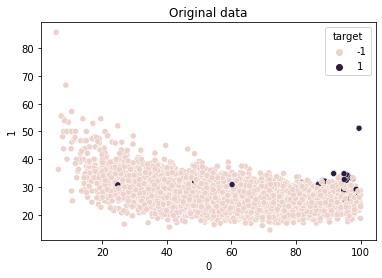

In [48]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

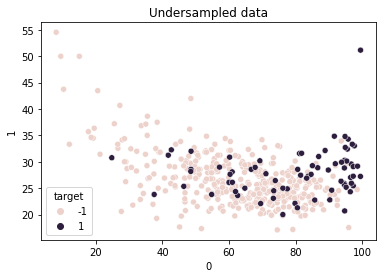

In [49]:
# dữ liệu undersampled 

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

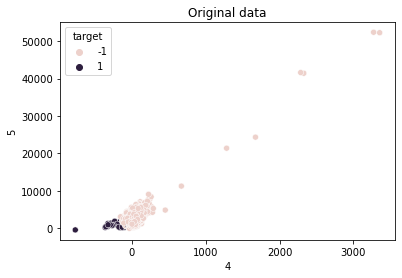

In [50]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

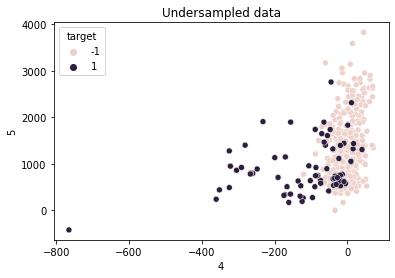

In [51]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [52]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [53]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng

## Yêu cầu 15:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9915242993498841
Test set
Random Forests roc-auc: 0.9368436196230757


In [54]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled

## Yêu cầu 16:
## VIẾT CODE Ở ĐÂY:
run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9974346003757768
Test set
Random Forests roc-auc: 0.9527326204063364


Chất lượng có vẻ tăng lên một chút.

**BÀI TẬP**

- Thử thay đổi số neighbour dùng để chọn các quan sát của lớp đa số và với các mô hình học máy khác. So sánh kích thước tập dữ liệu cuối cùng, chất lượng mô hình và phân phối của các quan sát trước và sau khi undersampling.

# Tomek Link


Tomek link là 2 mẫu của hai lớp khác nhau, là nearest neighbour với nhau. Nói cách khác, nếu 2 quan sát là nearest neighbour của nhau ở khác lớp thì chúng là Tomek Link.

Quy trình này loại các mẫu của lớp đa số nếu đó là Tomek Link hoặc loại cả quan sát của lớp đa số và lớp thiểu số.

====

- **Tiêu chí loại dữ liệu**: Các mẫu là Tomek Link
- **Kích thước tập dữ liệu cuối cùng**: biến thiên

In [55]:
from imblearn.under_sampling import TomekLinks

## Undersample với Tomek Link

[TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

### Các lớp được phân tách tốt

In [57]:
## Yêu cầu 17:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập Tomek Link

tl = TomekLinks(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = tl.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[TomekLinks()](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.TomekLinks.html)

</details>

In [58]:
# kích thước dữ liệu gốc

X.shape, y.shape

((1000, 2), (1000,))

In [59]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((994, 2), (994,))

In [60]:
# số quan sát của lớp thiểu số

y.value_counts()

0    983
1     17
dtype: int64

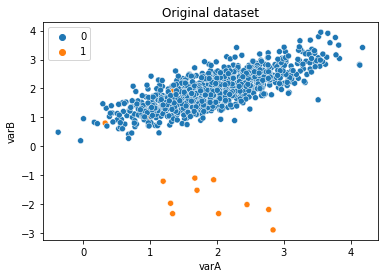

In [61]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

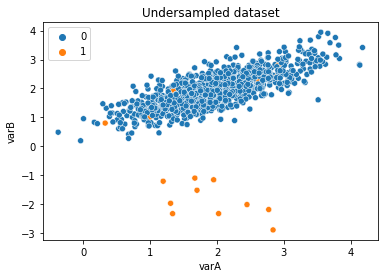

In [62]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

### Các lớp bị phân tách một phần

In [63]:
## Yêu cầu 18:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu
X, y = make_data(sep=0.5)

# thiết lập Tomek Link

tl = TomekLinks(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = tl.fit_resample(X, y)

<details><summary> Gợi ý </summary>

[TomekLinks()](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.TomekLinks.html)

</details>

In [64]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [65]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((988, 2), (988,))

Lưu ý rằng có nhiều mẫu bị loại khỏi tập huấn luyện cuối cùng hơn so với trường hợp trước mà các lớp bị phân tách nhiều hơn. Đây là do có nhiều Tomek Link hơn, bây giờ các lớp không bị phân tách quá nhiều.

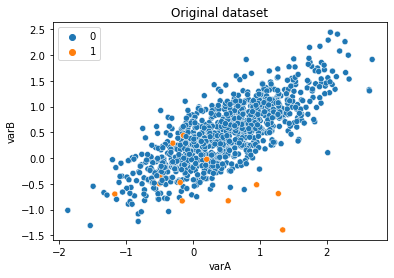

In [66]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

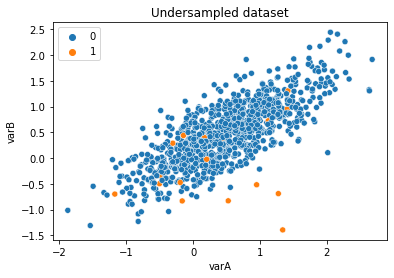

In [67]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

**BÀI TẬP**

- Loại cả quan sát của lớp đa số và lớp thiểu số khỏi Tomek Link và so sánh kích thước của tập dữ liệu undersampled và phân phối của các quan sát trong biểu đồ.

===

Original dataset shape: X: (1000, 2), y: (1000,)
Resampled dataset shape: X: (976, 2), y: (976,)


<AxesSubplot:xlabel='varA', ylabel='varB'>

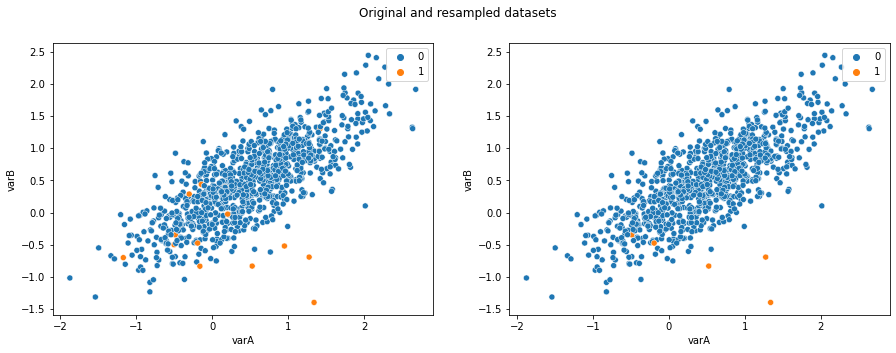

In [68]:
X, y = make_data(sep=0.5)

tl = TomekLinks(sampling_strategy='all', n_jobs=4) # loại bỏ tất cả khỏi tomek link

X_resampled, y_resampled = tl.fit_resample(X, y)

print("Original dataset shape: X: {}, y: {}".format(X.shape, y.shape))
print("Resampled dataset shape: X: {}, y: {}".format(X_resampled.shape, y_resampled.shape))

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Original and resampled datasets')

sns.scatterplot(ax=axes[0], data=X, x="varA", y="varB", hue=y)
sns.scatterplot(ax=axes[1], data=X_resampled, x="varA", y="varB", hue=y_resampled)

## Tomek Link

### Dữ liệu thực - So sánh chất lượng

Nó có hoạt động tốt với các tập dữ liệu thực không? 

Điều này còn tùy thuộc vào tập dữ liệu, do đó hãy thử và so sánh mô hình đã xây trên toàn bộ tập dữ liệu với mô hình được xây trên tập dữ liệu undersampled.

In [69]:
# load dữ liệu
# chỉ có ít quan sát để tăng tốc tính toán

data = pd.read_csv('kdd2004.csv').sample(10000)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
98166,75.50,22.81,-1.07,-53.0,107.0,2209.0,0.93,-0.85,-37.5,-61.0,...,3497.5,0.10,-0.01,-4.0,-37.0,548.8,-0.25,0.22,0.56,-1
90389,88.33,26.69,0.02,-35.0,108.5,6395.3,-3.21,3.27,75.0,-146.5,...,5939.3,-1.57,-1.37,-10.0,-108.0,988.8,1.84,0.34,0.59,-1
20055,34.65,30.77,1.40,29.5,6.5,2541.5,0.06,-1.33,-18.0,-63.5,...,2525.0,0.51,2.98,13.0,-76.0,342.7,1.26,0.37,0.66,-1
69588,70.00,23.46,-0.46,10.0,-2.0,1112.7,2.25,-0.17,1.0,-86.5,...,2390.4,-0.94,2.66,15.0,-107.0,667.9,0.94,0.13,-0.06,-1
96699,56.25,29.63,-3.06,-40.0,21.5,500.2,-0.11,-0.34,1.0,-58.0,...,381.4,-0.53,-0.10,6.0,-27.0,154.6,-0.32,-0.03,-0.23,-1


In [70]:
# mục tiêu không cân bằng
data.target.value_counts() / len(data)

-1    0.9918
 1    0.0082
Name: target, dtype: float64

In [71]:
# tách thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [72]:
# thiết lập Tomek Link

## Yêu cầu 19:
## VIẾT CODE Ở ĐÂY:

tl = TomekLinks(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

In [73]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((6992, 74), (6992,))

Tập dữ liệu undersampled khá tương tự với tập dữ liệu ban đầu, chỉ có 5 quan sát bị loại. Do đó không có ích mấy trong việc kiểm tra chất lượng. Khác biệt về chất lượng đa số sẽ được thúc đẩy bởi tính ngẫu nhiên của random forest hơn là bởi khác biệt trong tập dữ liệu.

In [74]:
# số lớp positive trong tập dữ liệu ban đầu
y_train.value_counts()

-1    6938
 1      62
Name: target, dtype: int64

## Vẽ biểu đồ dữ liệu

Hãy so sánh dữ liệu trông như thế nào trước và sau khi undersampling.

Text(0.5, 1.0, 'Original data')

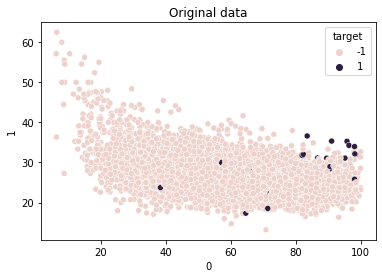

In [75]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

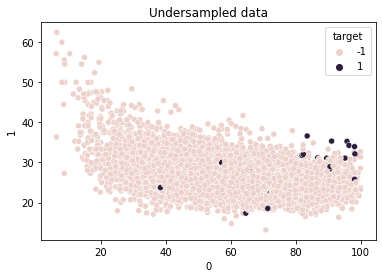

In [76]:
# dữ liệu undersampled 

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

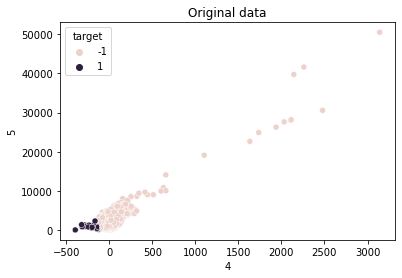

In [77]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

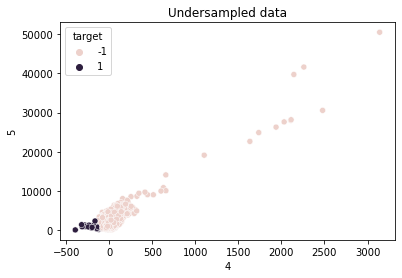

In [78]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [79]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [80]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng

## Yêu cầu 20:
## VIẾT CODE Ở ĐÂY:

run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.9943532113930761
Test set
Random Forests roc-auc: 0.9623322147651007


In [81]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled

## Yêu cầu 21:
## VIẾT CODE Ở ĐÂY:

run_randomForests(X_resampled, X_test, y_resampled, y_test)

Train set
Random Forests roc-auc: 0.9931946190010706
Test set
Random Forests roc-auc: 0.9832046979865773


Tomek Link dường như không giúp cải thiện chất lượng.

**BÀI TẬP**

- Thử loại cả hai thành phần của Tomek Link. So sánh kích thước tập dữ liệu cuối cùng, chất lượng mô hình và phân phối của các quan sát trước và sau khi undersampling.

# Lựa chọn một bên

Trước tiên, hãy tìm trường hợp khó phân loại đúng nhất của lớp đa số, sau đó xóa các quan sát nhiễu với Tomek Link.

In [82]:
from imblearn.under_sampling import OneSidedSelection

## Undersample với Lựa chọn một bên 

[OneSidedSelection](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.OneSidedSelection.html)

### Các lớp được phân tách tốt

In [86]:
## Yêu cầu 21:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu

X, y = make_data(sep=2)

# thiết lập OSS

oss = OneSidedSelection(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    random_state=0,  # khả năng tái lặp
    n_neighbors=1,# mặc định, thuật toán tìm các trường hợp khó nhất.
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = oss.fi(X, y)

<details><summary> Gợi ý </summary>

[OneSidedSelection()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.OneSidedSelection.html)

</details>

In [87]:
# kích thước dữ liệu gốc

X.shape, y.shape

((1000, 2), (1000,))

In [88]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((730, 2), (730,))

Lưu ý rằng có nhiều quan sát hơn bị loại so với chỉ dùng Tomek Link.

In [89]:
# số quan sát của lớp thiểu số

y.value_counts()

0    983
1     17
dtype: int64

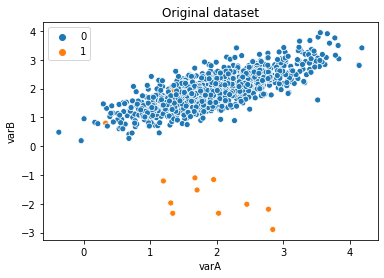

In [90]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

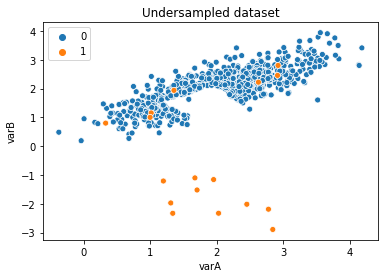

In [91]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

### Các lớp bị phân tách một phần

In [92]:
## Yêu cầu 22:
## VIẾT CODE Ở ĐÂY:

# tạo dữ liệu
X, y = make_...(sep=0.5)

# set up OSS

oss = ...(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    random_state=0,  # khả năng tái lặp
    n_neighbors=1,# mặc định
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = oss....(X, y)

<details><summary> Gợi ý </summary>

[OneSidedSelection()](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.OneSidedSelection.html)

</details>

In [93]:
# dữ liệu ban đầu

X.shape, y.shape

((1000, 2), (1000,))

In [94]:
# dữ liệu undersampled 

X_resampled.shape, y_resampled.shape

((939, 2), (939,))

Lưu ý rằng có nhiều mẫu bị loại khỏi tập huấn luyện cuối cùng hơn so với trường hợp trước mà các lớp bị phân tách nhiều hơn. 

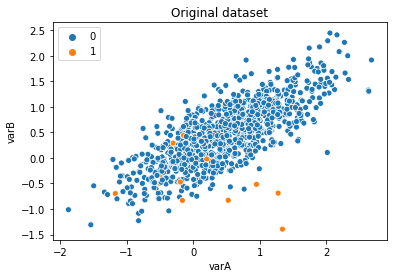

In [95]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

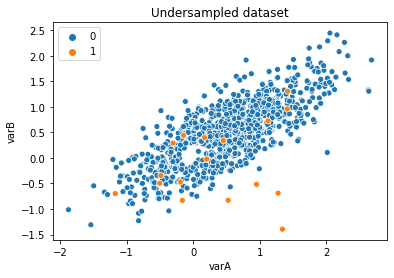

In [96]:
# vẽ biểu đồ dữ liệu undersampled 

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

**BÀI TẬP**

- Loại cả quan sát của lớp đa số và lớp thiểu số khỏi Tomek Link và so sánh kích thước của tập dữ liệu undersampled và phân phối của các quan sát trong biểu đồ.
- Thay đổi số lượng neighbour và so sánh kết quả.

===


## Lựa chọn một bên

### Dữ liệu thực - So sánh chất lượng

Nó có hoạt động tốt với các tập dữ liệu thực không? 

Điều này còn tùy thuộc vào tập dữ liệu, do đó hãy thử và so sánh mô hình đã xây trên toàn bộ tập dữ liệu với mô hình được xây trên tập dữ liệu undersampled.

In [97]:
# load dữ liệu
# chỉ có ít quan sát để tăng tốc tính toán

data = pd.read_csv('../kdd2004.csv').sample(10000, random_state=1)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
88984,71.15,32.43,1.29,28.0,-39.0,1639.2,-1.33,1.03,9.5,-82.5,...,1054.2,0.80,3.28,0.0,-60.0,623.1,0.11,0.25,0.31,-1
140218,30.72,36.17,-0.24,-6.5,3.5,1249.7,0.45,0.32,8.0,-75.0,...,1524.8,-2.70,0.75,-3.0,-20.0,1.2,0.74,0.56,0.29,-1
91280,11.84,42.86,0.21,-25.0,26.5,2346.3,0.10,-0.77,-38.0,-62.0,...,3392.7,-2.76,1.02,21.0,-106.0,1236.6,0.01,0.56,0.27,-1
22351,26.67,28.57,-0.57,0.5,50.5,1195.0,0.69,0.16,-3.5,-43.0,...,1301.9,1.10,0.09,7.0,-29.0,263.0,0.51,0.58,0.61,-1
27966,40.32,26.34,-0.97,-57.5,79.5,4939.5,-0.80,0.56,7.5,-117.5,...,3544.6,0.84,0.02,15.0,-196.0,1667.2,0.16,0.14,0.28,-1


In [98]:
# mục tiêu không cân bằng
data.target.value_counts() / len(data)

-1    0.99
 1    0.01
Name: target, dtype: float64

In [99]:
# tách thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # giảm mục tiêu
    data['target'],  # chỉ mục tiêu
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [100]:
# this is going to take a while

## Yêu cầu 23:
## VIẾT CODE Ở ĐÂY:

# thiết lập OSS

oss = ...(
    sampling_strategy='auto',  # chỉ lấy mẫu dưới lớp đa số
    random_state=0,  # khả năng tái lặp
    n_neighbors=1,# mặc định
    n_jobs=4)  # có 4 core trong máy

X_resampled, y_resampled = oss....(X_train, ...)

In [101]:
# kích thước dữ liệu undersampled

X_resampled.shape, y_resampled.shape

((6827, 74), (6827,))

In [102]:
# số lớp positive trong tập dữ liệu ban đầu
y_train.value_counts()

-1    6931
 1      69
Name: target, dtype: int64

## Vẽ biểu đồ dữ liệu

Hãy so sánh dữ liệu trông như thế nào trước và sau khi undersampling.

Text(0.5, 1.0, 'Original data')

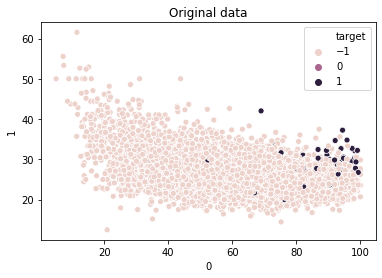

In [103]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

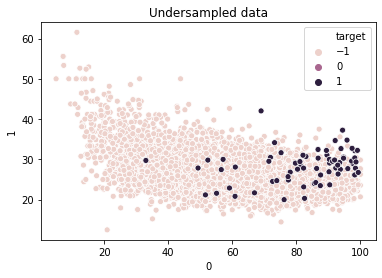

In [104]:
# dữ liệu undersampled 

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

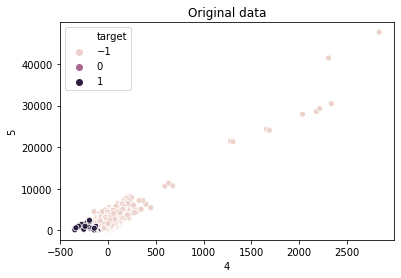

In [105]:
# dữ liệu ban đầu

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

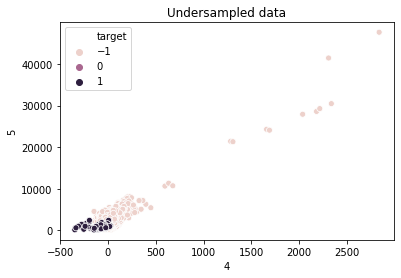

In [106]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

## So sánh chất lượng thuật toán học máy

Hãy so sánh chất lượng mô hình khi có và không có kỹ thuật undersampling.

In [107]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [108]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu mất cân bằng
## Yêu cầu 24:
## VIẾT CODE Ở ĐÂY:
run_...(X_train, ..., ..., y_test)

Train set
Random Forests roc-auc: 0.9882799186180969
Test set
Random Forests roc-auc: 0.9809319962189941


In [109]:
# đánh giá chất lượng của thuật toán được xây
# sử dụng tập dữ liệu undersampled
## Yêu cầu 25:
## VIẾT CODE Ở ĐÂY:
run_...(..., ..., y_resampled, y_test)

Train set
Random Forests roc-auc: 0.9925284472294779
Test set
Random Forests roc-auc: 0.9706537446082639


Lựa chọn một bên dường như không giúp cải thiện chất lượng.

**BÀI TẬP**

- Thử loại cả hai thành phần của Tomek Link và thay đổi số lượng neighbour. So sánh kích thước tập dữ liệu cuối cùng, chất lượng mô hình và phân phối của các quan sát trước và sau khi undersampling.